In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

In [29]:
column_names = ['Число вершин', 'Число ребер', 'Число терминальных вершин', 'Приблизительное решение', 
                'Время поиска приблизительного решения (сек.)', 'Точное решение']
names = column_names + ['Коэффициент приближения']
titles = ['Зависимость времени поиска приблизительного решения от числа вершин',
         'Зависимость коэффициента приближения от числа вершин',
         'Зависимость времени поиска приблизительного решения от числа ребер',
         'Зависимость коэффициента приближения от числа ребер',
         'Зависимость времени поиска приблизительного решения от числа терминальных вершин',
         'Зависимость коэффициента приближения от числа терминальных вершин',]
variables = [0, 1, 2]
dependencies = [4, 6]

def draw(data, opt_time=False):
    
    plt.figure(figsize=(16, 14))
    plt.subplots_adjust(hspace=0.3)
    k = 1
    for var in variables:
        for dependent in dependencies:
            grouped = data.groupby(names[var]).mean()
            
            plt.subplot(len(variables), len(dependencies), k)
            plt.title(titles[k - 1], size=12)
            plt.plot(grouped.index, grouped[names[dependent]], lw=3, label=names[dependent])
            
            plt.legend(prop={'size': 12})
            plt.xlabel(names[var])
            
            k += 1
            
    plt.show()

In [3]:
def describe(data):
    descr = data.describe().T[['max','min', 'mean', '50%']].T
    descr.columns = ['|V|', '|E|', '|R|', 'Approx.', 'Approx. time', 'Opt.', 'Approx. coeff.']
    return descr

In [4]:
random_weights = pd.read_csv('data/random_weights.csv', sep=';', names=column_names)
random_weights['Коэффициент приближения'] = random_weights['Приблизительное решение'] / random_weights['Точное решение']
random_weights.head()

,Число вершин,Число ребер,Число терминальных вершин,Приблизительное решение,Время поиска приблизительного решения (сек.),Точное решение,Коэффициент приближения
0,50,63,9,94,0.006011,82,1.146341
1,50,63,13,97,0.006011,83,1.168675
2,50,63,25,140,0.007007,138,1.014493
3,50,100,9,68,0.007011,59,1.152542
4,50,100,13,67,0.006982,61,1.098361


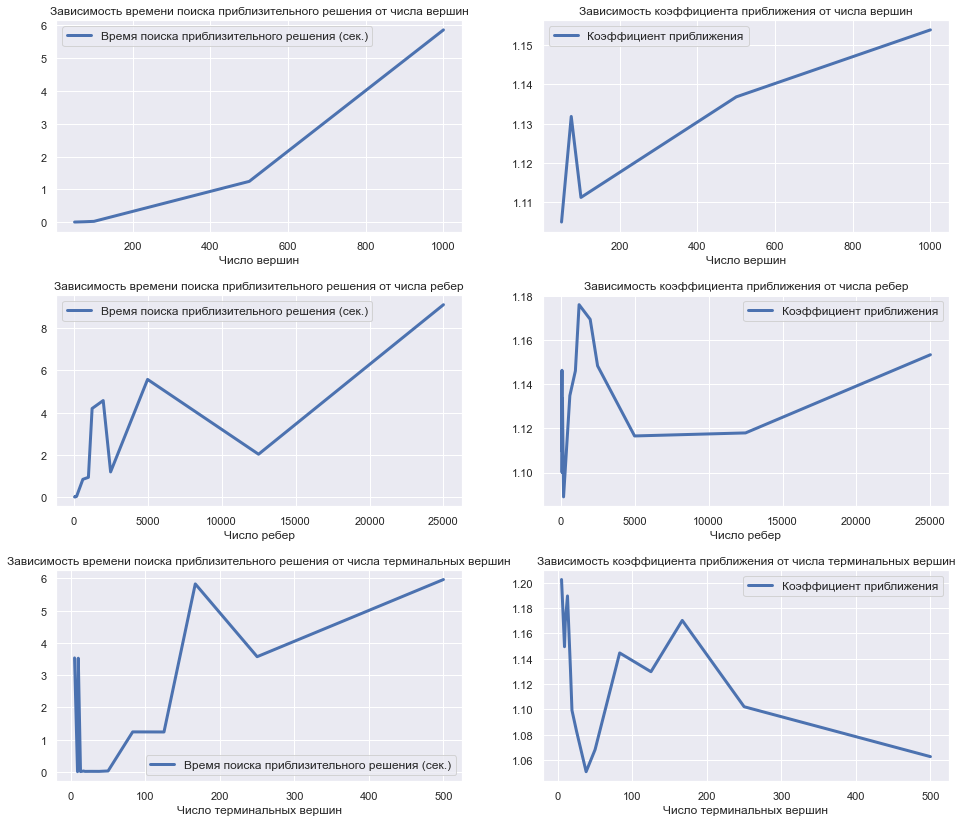

In [5]:
draw(random_weights)

In [6]:
describe(random_weights)

,|V|,|E|,|R|,Approx.,Approx. time,Opt.,Approx. coeff.
max,1000.000000,25000.000000,500.000000,3538.000000,9.187801,3250.000000,1.272727
min,50.000000,63.000000,5.000000,13.000000,0.006011,11.000000,1.007491
mean,540.517241,4337.431034,104.103448,495.603448,2.455763,443.706897,1.136260
50%,500.000000,1250.000000,25.000000,172.000000,1.174348,155.500000,1.139465


In [7]:
complete_euclidean = pd.read_csv('data/complete_euclidean.csv', sep=';', names=column_names)
complete_euclidean['Коэффициент приближения'] = complete_euclidean[
    'Приблизительное решение'] / complete_euclidean['Точное решение']
complete_euclidean.head()

,Число вершин,Число ребер,Число терминальных вершин,Приблизительное решение,Время поиска приблизительного решения (сек.),Точное решение,Коэффициент приближения
0,52,1326,16,1069,0.013992,1044,1.023946
1,58,1653,25,13682,0.024960,13655,1.001977
2,100,4950,5,1166,0.081754,1138,1.024605
3,100,4950,5,1239,0.081754,1228,1.008958
4,100,4950,10,1642,0.082779,1609,1.020510


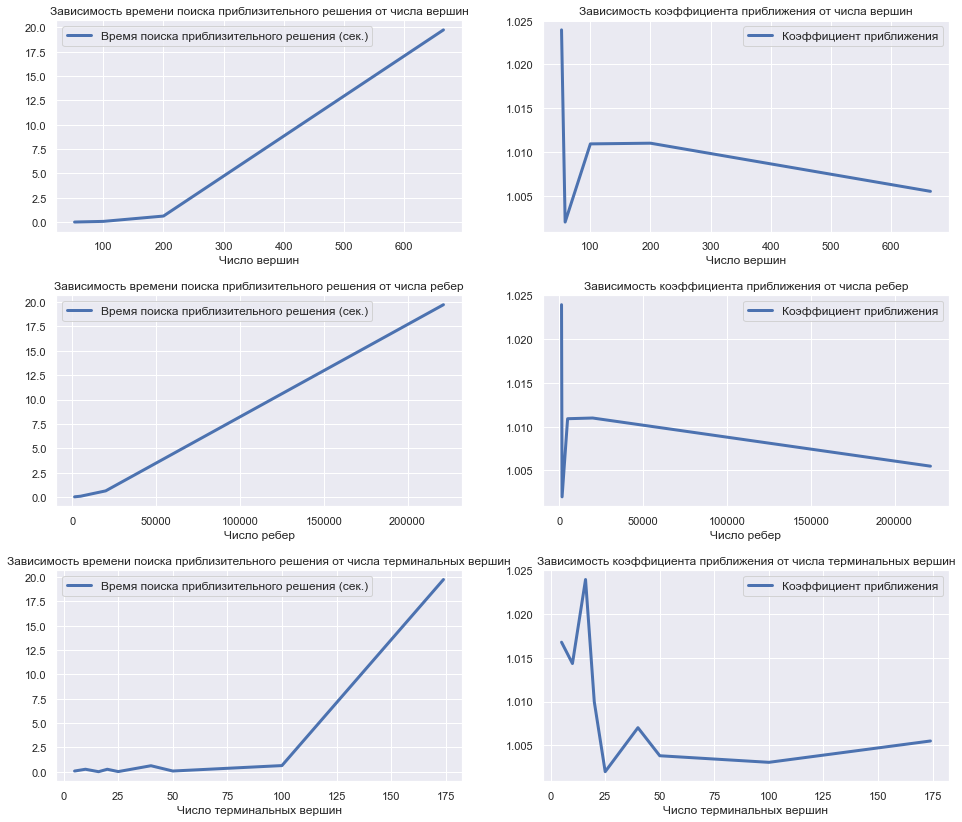

In [8]:
draw(complete_euclidean)

In [9]:
describe(complete_euclidean)

,|V|,|E|,|R|,Approx.,Approx. time,Opt.,Approx. coeff.
max,666.000000,221445.0,174.000000,123139.000000,19.725824,122467.0,1.024605
min,52.000000,1326.0,5.000000,1069.000000,0.013992,1044.0,1.000000
mean,162.571429,24191.0,36.071429,11993.214286,1.632688,11923.5,1.010840
50%,100.000000,4950.0,20.000000,2461.000000,0.082778,2445.0,1.007983


In [10]:
complete_random = pd.read_csv('data/complete_random.csv', sep=';', names=column_names)
complete_random['Коэффициент приближения'] = complete_random['Приблизительное решение'] / complete_random['Точное решение']
complete_random.head()

,Число вершин,Число ребер,Число терминальных вершин,Приблизительное решение,Время поиска приблизительного решения (сек.),Точное решение,Коэффициент приближения
0,100,4950,5,170,0.130650,155,1.096774
1,100,4950,5,116,0.118729,116,1.000000
2,100,4950,5,207,0.118686,179,1.156425
3,100,4950,10,289,0.118188,270,1.070370
4,100,4950,10,329,0.122220,270,1.218519


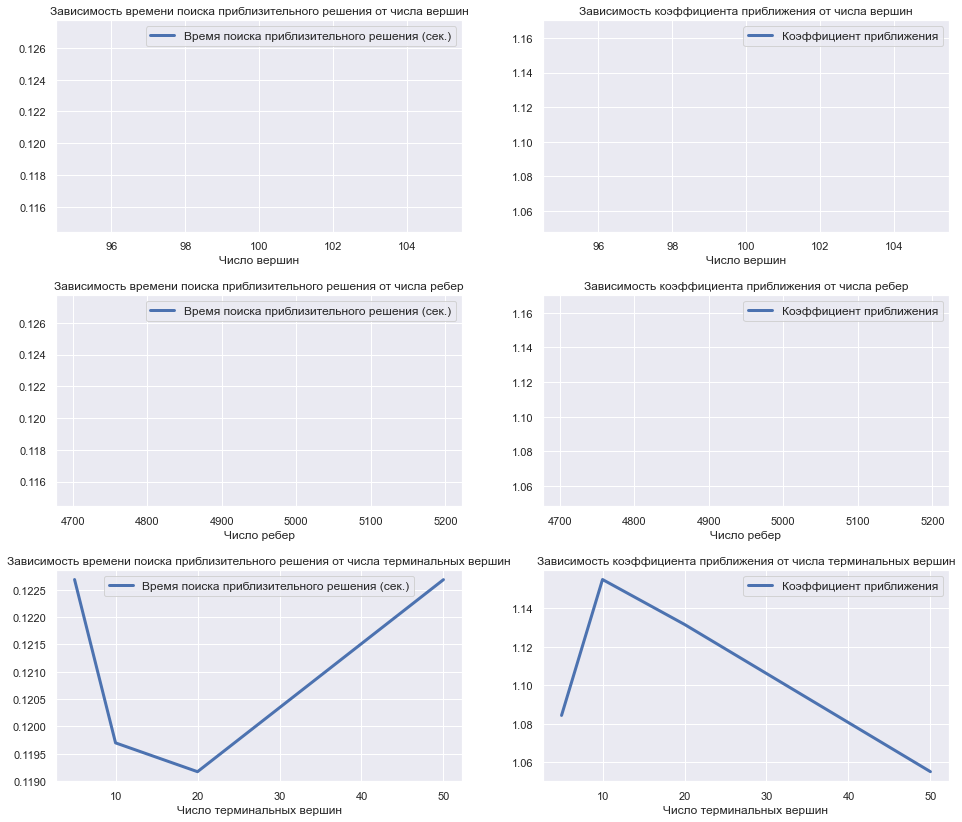

In [11]:
draw(complete_random)

In [12]:
describe(complete_random)

,|V|,|E|,|R|,Approx.,Approx. time,Opt.,Approx. coeff.
max,100.0,4950.0,50.0,1045.0,0.130650,1010.0,1.218519
min,100.0,4950.0,5.0,116.0,0.118188,116.0,1.000000
mean,100.0,4950.0,18.5,481.5,0.121086,438.5,1.109165
50%,100.0,4950.0,10.0,335.0,0.119192,280.0,1.103738


In [13]:
sparse_euclidean = pd.read_csv('data/sparse_euclidean.csv', sep=';', names=column_names)
sparse_euclidean['Коэффициент приближения'] = sparse_euclidean['Приблизительное решение'] / sparse_euclidean['Точное решение']
sparse_euclidean.head()

,Число вершин,Число ребер,Число терминальных вершин,Приблизительное решение,Время поиска приблизительного решения (сек.),Точное решение,Коэффициент приближения
0,100,180,5,7592,0.025960,7485,1.014295
1,100,180,5,8853,0.025956,8746,1.012234
2,100,180,5,9327,0.025957,8688,1.073550
3,100,180,10,17877,0.024960,15972,1.119271
4,100,180,10,22399,0.025958,19496,1.148902


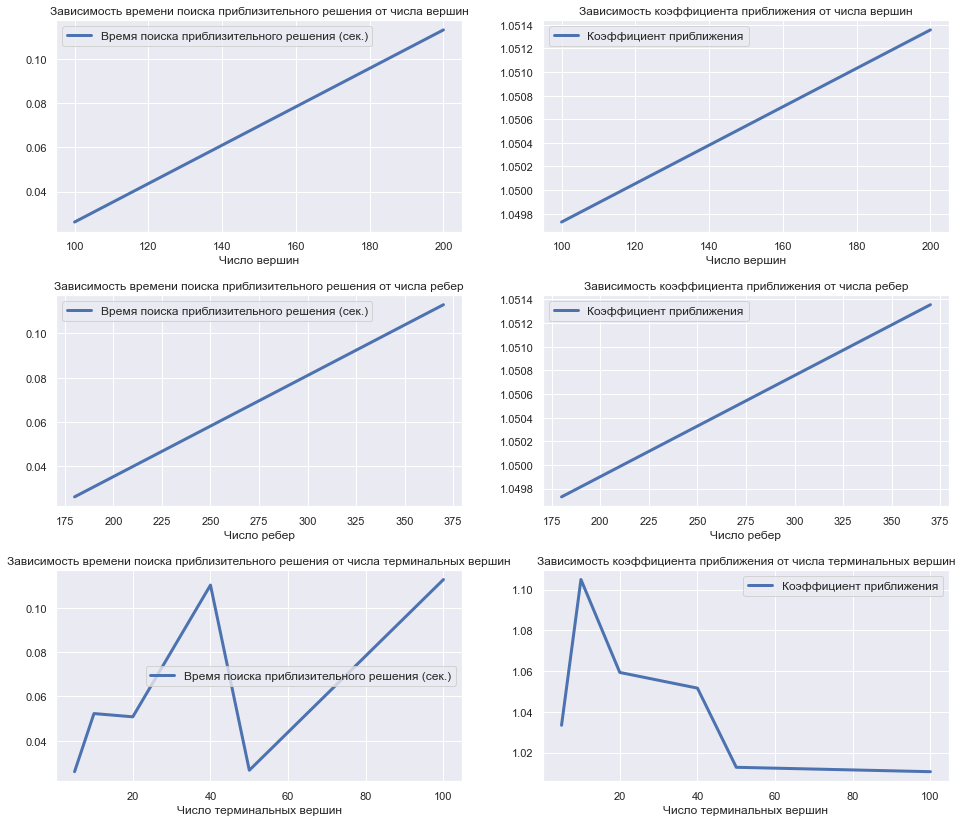

In [14]:
draw(sparse_euclidean)

In [15]:
describe(sparse_euclidean)

,|V|,|E|,|R|,Approx.,Approx. time,Opt.,Approx. coeff.
max,200.000000,370.000000,100.000000,87182.000000,0.123180,86268.000000,1.148902
min,100.000000,180.000000,5.000000,7592.000000,0.024933,7485.000000,1.002485
mean,126.666667,230.666667,27.666667,31790.933333,0.049352,30511.733333,1.050163
50%,100.000000,180.000000,20.000000,24496.000000,0.025960,23078.000000,1.046545


In [16]:
sparse_random = pd.read_csv('data/sparse_random.csv', sep=';', names=column_names)
sparse_random['Коэффициент приближения'] = sparse_random['Приблизительное решение'] / sparse_random['Точное решение']
sparse_random.head()

,Число вершин,Число ребер,Число терминальных вершин,Приблизительное решение,Время поиска приблизительного решения (сек.),Точное решение,Коэффициент приближения
0,100,180,5,8800,0.027952,8083,1.088705
1,100,180,5,5295,0.028923,5022,1.054361
2,100,180,10,12120,0.027927,11397,1.063438
3,100,180,10,12771,0.027925,10355,1.233317
4,100,180,10,14675,0.027952,13048,1.124693


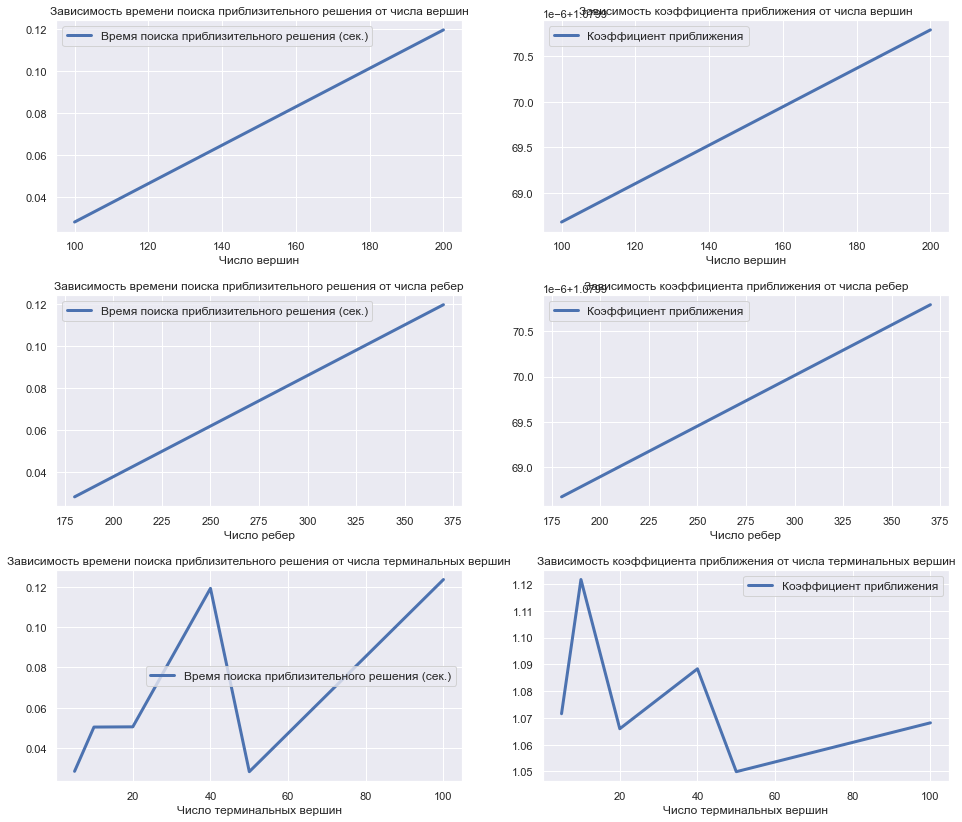

In [17]:
draw(sparse_random)

In [18]:
describe(sparse_random)

,|V|,|E|,|R|,Approx.,Approx. time,Opt.,Approx. coeff.
max,200.000000,370.000000,100.0,66506.000000,0.123670,62263.0,1.233317
min,100.000000,180.000000,5.0,5295.000000,0.027925,5022.0,1.034054
mean,126.666667,230.666667,28.0,23893.666667,0.052563,22248.6,1.079969
50%,100.000000,180.000000,20.0,19584.000000,0.027952,18263.0,1.065169


In [19]:
grid_graph = pd.read_csv('data/grid_graph.csv', sep=';', names=column_names)
grid_graph['Коэффициент приближения'] = grid_graph['Приблизительное решение'] / grid_graph['Точное решение']
grid_graph.head()

,Число вершин,Число ребер,Число терминальных вершин,Приблизительное решение,Время поиска приблизительного решения (сек.),Точное решение,Коэффициент приближения
0,338,541,11,529,0.337922,467,1.132762
1,1290,2270,10,875,7.409902,823,1.063183
2,1442,2403,16,915,9.814334,884,1.035068
3,752,1264,26,931,2.024369,806,1.155087
4,402,695,11,550,0.485852,494,1.113360


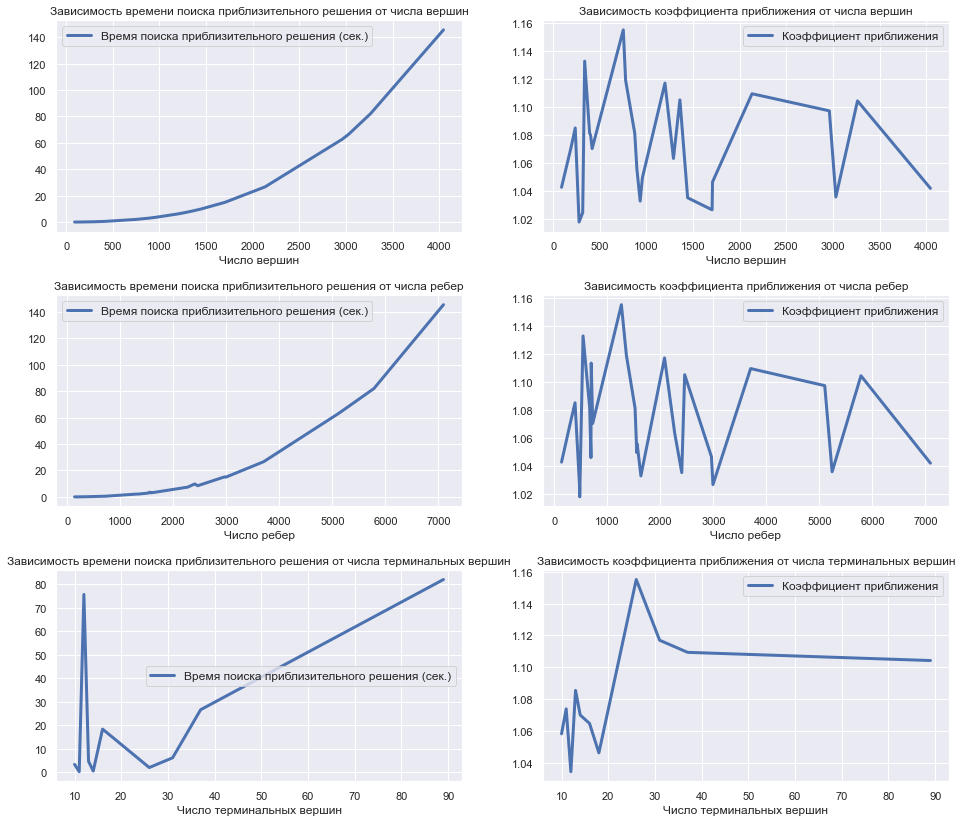

In [20]:
draw(grid_graph)

In [21]:
describe(grid_graph)

,|V|,|E|,|R|,Approx.,Approx. time,Opt.,Approx. coeff.
max,4045.000000,7094.00000,89.000000,3462.000000,145.524665,3135.000000,1.155087
min,90.000000,135.00000,10.000000,196.000000,0.019966,188.000000,1.017730
mean,1199.666667,2076.62963,17.407407,875.888889,17.254727,812.851852,1.072541
50%,898.000000,1554.00000,12.000000,653.000000,3.069680,607.000000,1.070175


In [22]:
optimal_solutions_time = pd.read_csv('data/optimal_solutions_time.csv', sep=';', names=
                                     column_names + ['Время поиска точного решения (сек.)'])
optimal_solutions_time['Коэффициент приближения'] = optimal_solutions_time[
    'Приблизительное решение'] / optimal_solutions_time['Точное решение']
optimal_solutions_time.head()

,Число вершин,Число ребер,Число терминальных вершин,Приблизительное решение,Время поиска приблизительного решения (сек.),Точное решение,Время поиска точного решения (сек.),Коэффициент приближения
0,111,110,106,35050,0.036901,34850,0.007979,1.005739
1,111,110,97,34650,0.033908,34100,3.936718,1.016129
2,111,110,96,34650,0.033996,34100,7.907494,1.016129
3,111,110,95,34850,0.032958,34100,15.781959,1.021994
4,111,110,94,34450,0.032953,33900,31.920154,1.016224


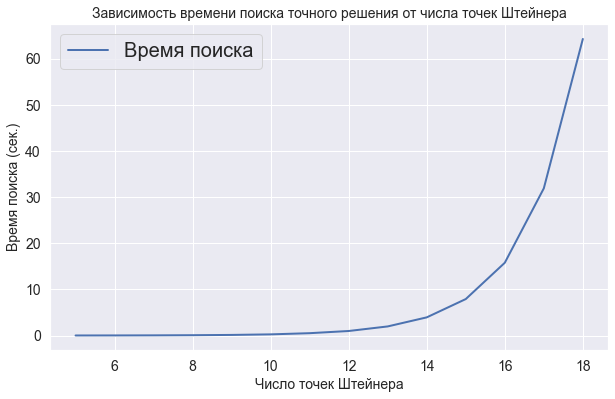

In [23]:
plt.figure(figsize=(10, 6))
plt.title('Зависимость времени поиска точного решения от числа точек Штейнера', size=14)
plt.plot(np.sort(111 - optimal_solutions_time['Число терминальных вершин']), 
         np.sort(optimal_solutions_time['Время поиска точного решения (сек.)']), label='Время поиска', lw=2)
plt.legend(prop={'size': 20})
plt.xlabel('Число точек Штейнера', size=14)
plt.ylabel('Время поиска (сек.)', size=14)
plt.tick_params(axis='both', labelsize=14)
plt.show()

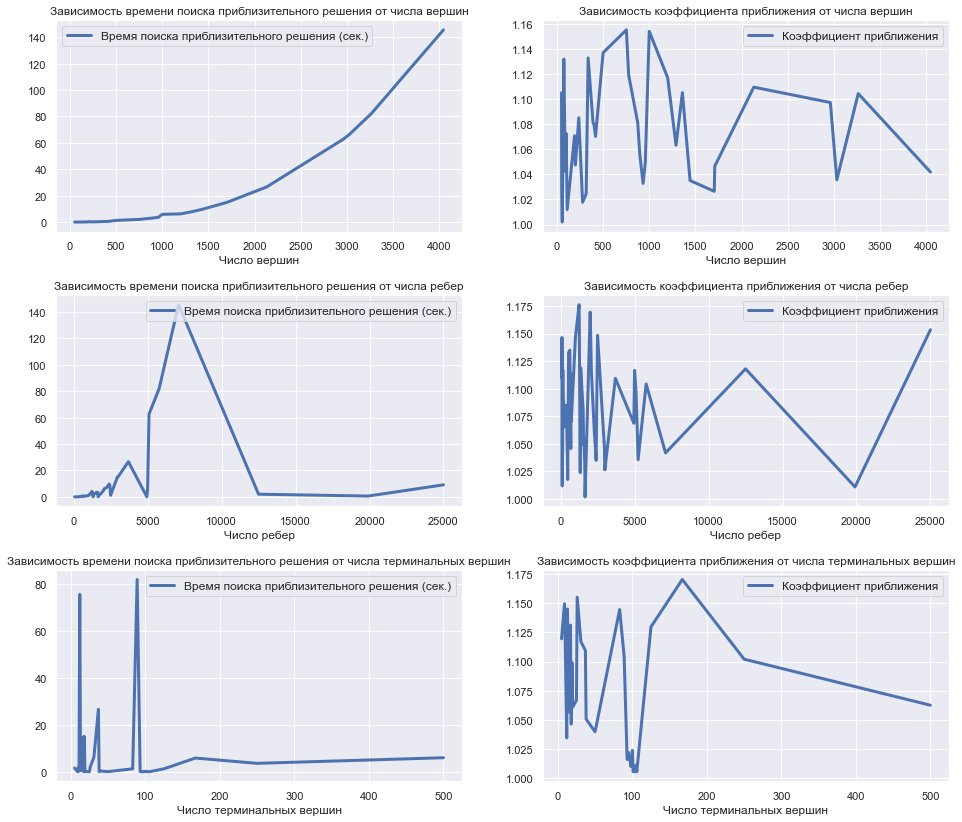

In [81]:
common_data = pd.concat((random_weights, complete_euclidean, complete_random, sparse_euclidean, sparse_random, grid_graph,
                        optimal_solutions_time[names]))
common_data = common_data[(common_data['Число ребер'] < 2 * 10 ** 5)]
draw(common_data)

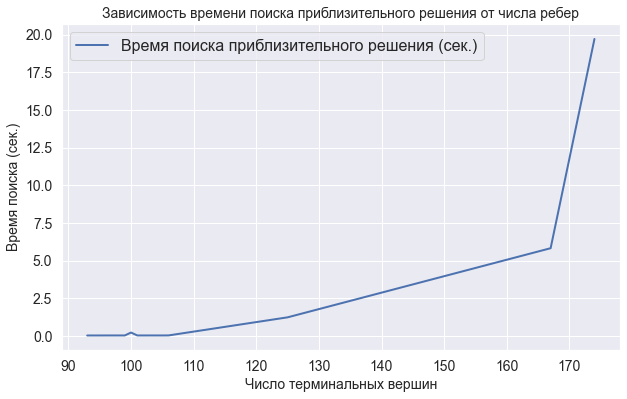

In [80]:
plt.figure(figsize=(10, 6))

grouped = common_data.groupby(names[variables[2]]).mean()

plt.title(titles[2], size=14)

plt.plot(grouped.index, grouped[names[dependencies[0]]], lw=2, label=names[dependencies[0]])

plt.legend(prop={'size': 16})
plt.xlabel(names[variables[2]], size=14)
plt.ylabel('Время поиска (сек.)', size=14)
plt.tick_params(axis='both', labelsize=14)
plt.show()

In [25]:
describe(common_data)

,|V|,|E|,|R|,Approx.,Approx. time,Opt.,Approx. coeff.
max,4045.000000,221445.000000,500.000000,123139.000000,145.524665,122467.000000,1.272727
min,50.000000,63.000000,5.000000,13.000000,0.006011,11.000000,1.000000
mean,473.013072,4603.098039,61.607843,10101.196078,4.146319,9737.261438,1.086430
50%,200.000000,723.000000,20.000000,969.000000,0.119654,926.000000,1.072332


In [66]:
pd.set_option('display.max_rows', common_data.shape[0]+1)
pd.set_option('display.max_colwidth', 1)
common_data.reset_index(inplace=True, drop=True)
data = common_data.copy()
data.columns = ['|V|', '|E|', '|R|', 'Approx.', 'Approx. time', 'Opt.', 'Approx. coeff.']
data

,|V|,|E|,|R|,Approx.,Approx. time,Opt.,Approx. coeff.
0,50,63,9,94,0.006011,82,1.146341
1,50,63,13,97,0.006011,83,1.168675
2,50,63,25,140,0.007007,138,1.014493
3,50,100,9,68,0.007011,59,1.152542
4,50,100,13,67,0.006982,61,1.098361
5,50,100,25,128,0.006980,122,1.049180
6,75,94,13,141,0.013989,111,1.270270
7,75,94,19,114,0.014960,104,1.096154
8,75,94,38,236,0.016982,220,1.072727
9,75,150,13,105,0.014987,86,1.220930
